In [3]:
df1.shape, df2.shape, df3.shape

((303, 14), (270, 14), (1190, 12))

In [4]:
df1.drop(columns = ['ca', 'thal'], inplace = True)
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0


In [5]:
df2.drop(columns = ['ca', 'thal'], inplace = True)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,70,1,3,130,322,0,2,109,0,2.4,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0
2,57,1,1,124,261,0,0,141,0,0.3,0,1
3,64,1,3,128,263,0,0,105,1,0.2,1,0
4,74,0,1,120,269,0,2,121,1,0.2,0,0


In [6]:
df3.rename(columns = {'resting bp s' : 'trestbps',
                      'cholesterol' : 'chol',
                      'fasting blood sugar' : 'fbs',
                       'chest pain type' : 'cp',
                        'resting ecg' : 'restecg',
                         'max heart rate' : 'thalach',
                         'exercise angina' : 'exang', 
                          'ST slope' : 'slope'} , inplace = True)

df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [9]:
# df1.shape, df2.shape, df3.shape
df.duplicated().sum()

542

In [10]:
df = pd.concat([df1, df2, df3])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0


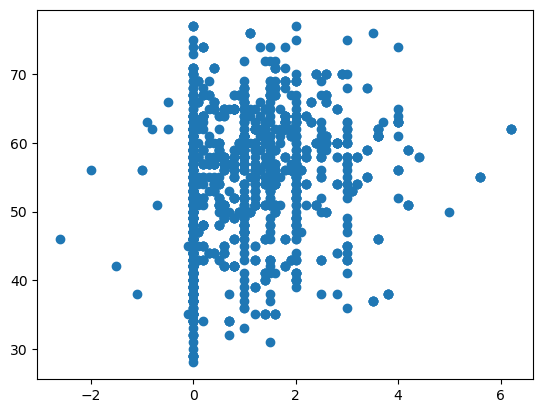

In [72]:
import matplotlib.pyplot as plt
plt.scatter(df['oldpeak'], df['age'])

<Axes: >

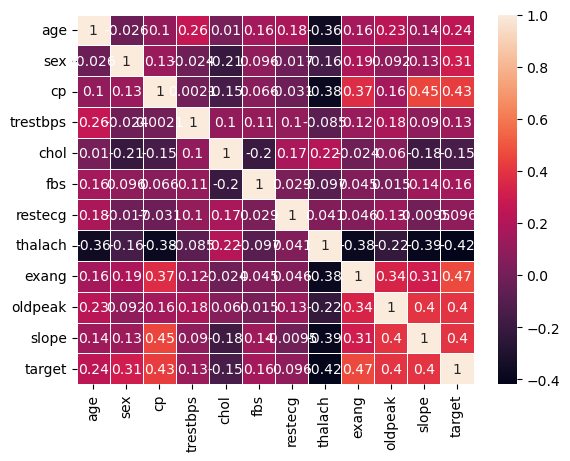

In [44]:
# heatmap

import seaborn as sns
relation = df.corr(numeric_only = True)

sns.heatmap(relation, annot = True, linewidths= 0.5)

<Axes: xlabel='age', ylabel='trestbps'>

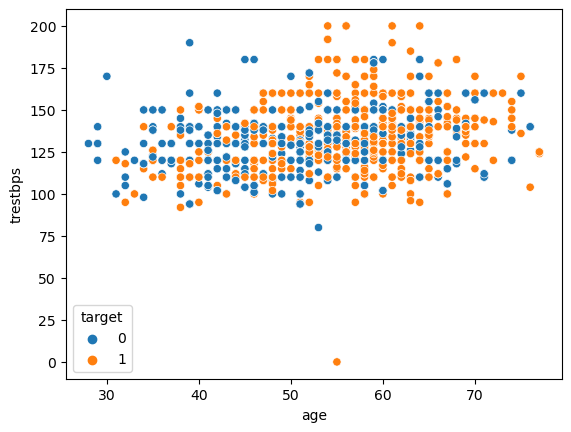

In [46]:
sns.scatterplot(x = 'age', y = 'trestbps', hue = 'target', data = df)

In [47]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
algo = StandardScaler()

x_train_new = algo.fit_transform(x_train)
x_test_new = algo.transform(x_test)

x_train_new.shape, x_test_new.shape, y_train.shape, y_test.shape

((1410, 11), (353, 11), (1410,), (353,))

In [78]:
# from sklearn import svm

# svc = svm.SVC()

# svc.fit(x_train_new, y_train)

# y_pred = svc.predict(x_test_new)
# y_pred_train = svc.predict(x_train_new)

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_train,y_pred_train), accuracy_score(y_test, y_pred))

0.9049645390070922 0.8498583569405099


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [20, 60, 100, 120],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train_new, y_train)
print("Best parameters:", grid_search.best_params_)

# rf.fit(x_train_new, y_train)

# y_pred = rf.predict(x_test_new)
# y_pred_train = rf.predict(x_train_new)

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_train,y_pred_train), accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 120}


In [81]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()

# lr.fit(x_train_new, y_train)

# y_pred = lr.predict(x_test_new)
# y_pred_train = lr.predict(x_train_new)

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_train,y_pred_train), accuracy_score(y_test, y_pred))

0.8127659574468085 0.7762039660056658


In [92]:
model = grid_search.best_estimator_

model.fit(x_train_new, y_train)
y_pred = model.predict(x_test_new)

accuracy_score(y_test, y_pred)

0.9405099150141643

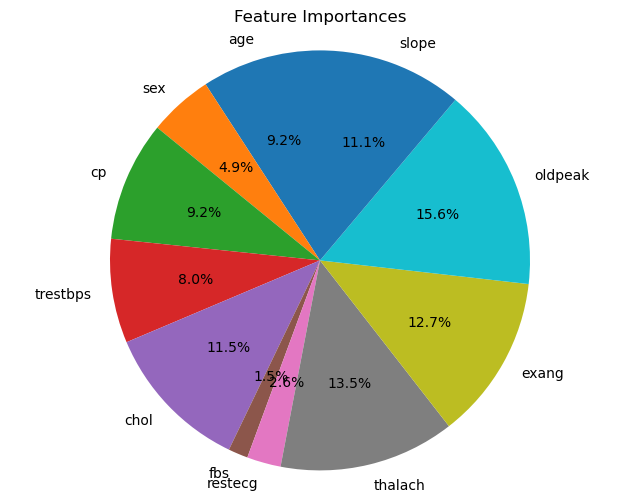

In [96]:
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = x.columns

# Create a pie chart for feature importances
plt.figure(figsize=(8, 6))
plt.pie(feature_importances, labels=feature_names, autopct='%1.1f%%', startangle=90)
plt.title('Feature Importances')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

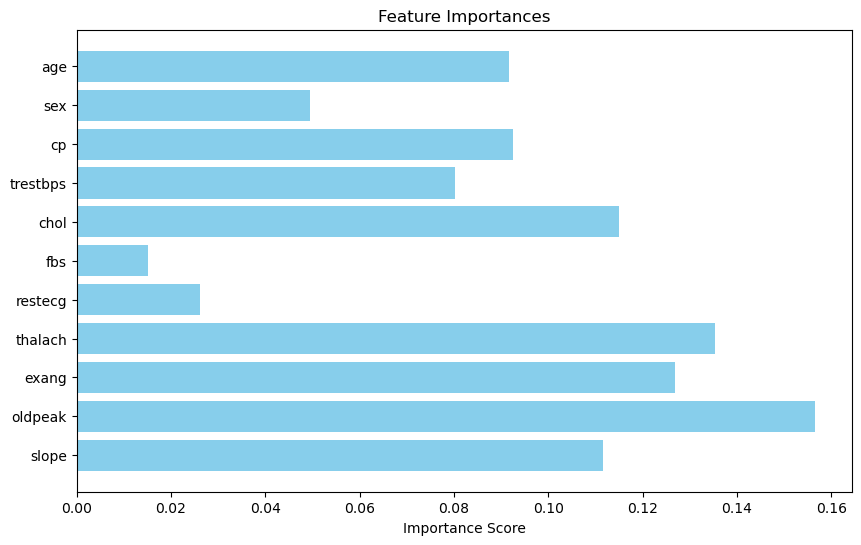

In [97]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

In [98]:
import pickle
with open('model.pkl', 'wb') as file :
    pickle.dump(model, file)